In [1]:
# Synthia Pial
# 7/6/25

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression

import patsy


In [3]:
df = sns.load_dataset('titanic')
# Load the Titanic dataset

df.head()
# It includes both numerical and categorical variables (sex, pclass, embarked). The focus will be on modeling fare using sex and pclass as categorical predictors.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
y, X = patsy.dmatrices('fare ~ C(sex) + age + C(pclass)', df)
# Use patsy to create design matrices, encoding categorical variables automatically

model = LinearRegression()
# Create a LinearRegression model

model.fit(X, y)
# Fit the model to the encoded data

print(f"Coefficients: {model.coef_}")
# Print the model coefficients to interpret the influence of predictors

Coefficients: [[  0.         -10.35904483 -69.96558867 -78.89515093  -0.45220005]]


In [5]:
 # Regression With Nonlinear Relationships

df = sns.load_dataset('tips')
# Load the tips dataset

df.head()
# Inspect the first few rows to understand the data


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


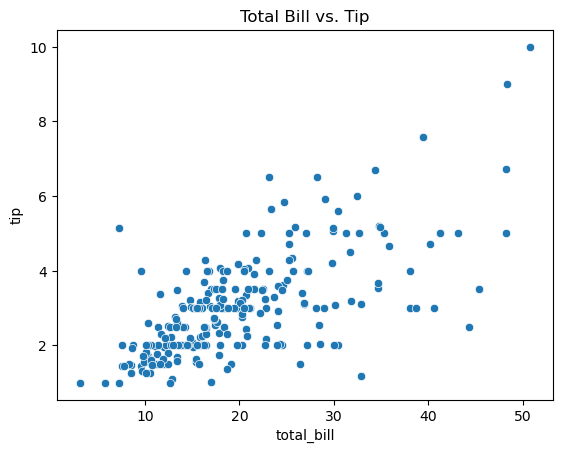

In [6]:
sns.scatterplot(x='total_bill', y='tip', data=df)
# Create a scatterplot of total_bill vs. tip to check for nonlinearity

plt.title('Total Bill vs. Tip')
# Add a title to the plot

plt.show()
# Show the plot for visual inspection

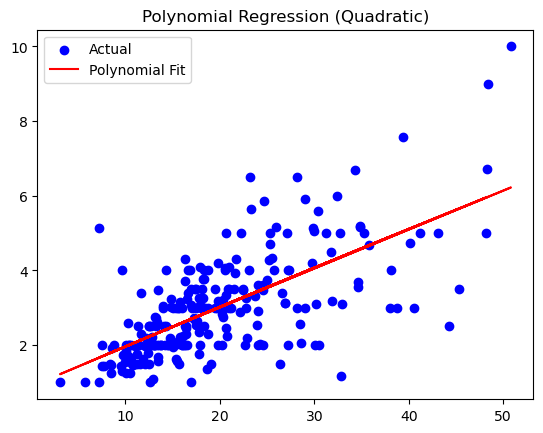

In [7]:
from sklearn.preprocessing import PolynomialFeatures
# Import PolynomialFeatures to create polynomial terms

poly = PolynomialFeatures(degree=2)
# Create a PolynomialFeatures transformer with degree 2 (quadratic)

X_poly = poly.fit_transform(df[['total_bill']])
# Transform total_bill into polynomial features

model = LinearRegression()
# Create a LinearRegression model

model.fit(X_poly, df['tip'])
# Fit the model using polynomial features

y_pred = model.predict(X_poly)
# Predict tip using the fitted model

plt.scatter(df['total_bill'], df['tip'], color='blue', label='Actual')
# Plot actual data points

plt.plot(df['total_bill'], y_pred, color='red', label='Polynomial Fit')
# Plot the fitted polynomial curve

plt.title('Polynomial Regression (Quadratic)')
# Add a title to the plot

plt.legend()
# Add a legend to distinguish actual vs. fitted

plt.show()
# Display the plot

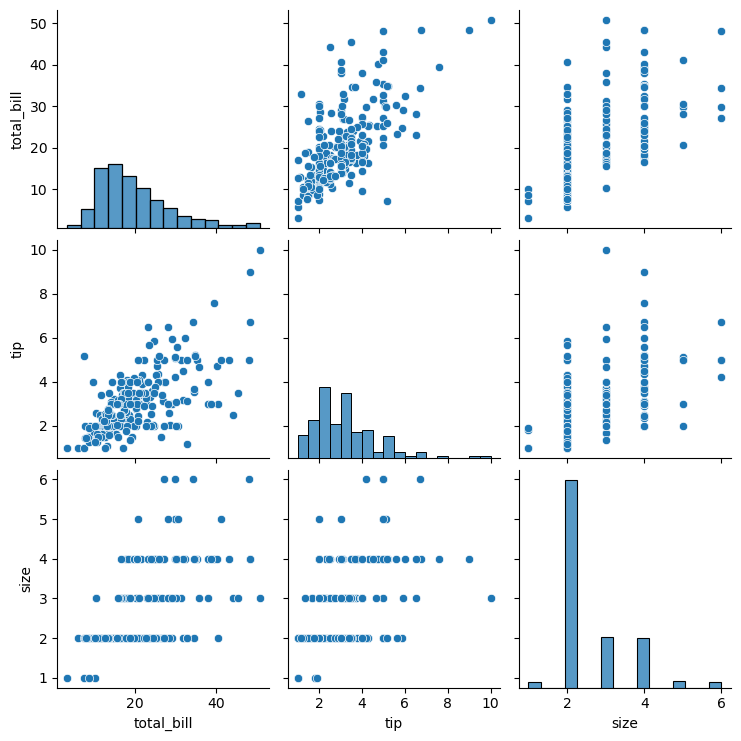

In [8]:
# Multiple Regression

df = sns.load_dataset('tips')
# Load the tips dataset again

sns.pairplot(df[['total_bill', 'tip', 'size']])
# Create pairwise plots to visualize relationships between variables

plt.show()
# Display the pairplot

In [9]:
X = df[['total_bill', 'size']]
# Define independent variables (total_bill and size)

y = df['tip']
# Define the dependent variable (tip)

model = LinearRegression()
# Create a LinearRegression model

model.fit(X, y)
# Fit the model using multiple predictors

print(f"Coefficients: {model.coef_}")
# Print model coefficients for interpretation

print(f"Intercept: {model.intercept_}")
# Print the intercept term

Coefficients: [0.09271334 0.19259779]
Intercept: 0.6689447408125035


In [10]:
# Logistic Regression Using logit()

df = sns.load_dataset('titanic')
# Load the Titanic dataset

df.head()
# Display the first few rows to understand the variables


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


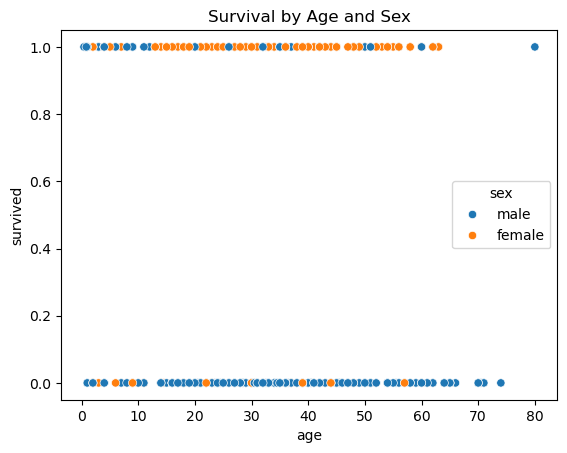

In [11]:
sns.scatterplot(x='age', y='survived', hue='sex', data=df)
# Create a scatterplot showing survival by age and sex

plt.title('Survival by Age and Sex')
# Add a title to the plot

plt.show()
# Display the plot

In [16]:
import statsmodels.api as sm
# Import statsmodels for statistical modeling

df_clean = df[['age', 'sex', 'survived']].dropna()
# Drop rows with missing values to avoid errors during model fitting

df_clean['age'] = df_clean['age'].astype(float)
# Ensure age is float

df_clean['survived'] = df_clean['survived'].astype(int)
# Ensure survived is integer

X = df_clean[['age', 'sex']]
# Select predictors age and sex from the cleaned data

X = pd.get_dummies(X, drop_first=True)
# Convert the categorical variable sex into dummy variables

X = sm.add_constant(X)
# Add a constant term for the intercept

X = X.astype(float)
# Convert all columns in X to float (avoids object/bool error in Logit)

y = df_clean['survived']
# Define the binary target variable (survived) from the cleaned data

model = sm.Logit(y, X).fit()
# Fit the logistic regression model using logit

print(model.summary())
# Print a detailed summary including coefficients and p-values

Optimization terminated successfully.
         Current function value: 0.525180
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Sun, 06 Jul 2025   Pseudo R-squ.:                  0.2225
Time:                        21:24:21   Log-Likelihood:                -374.98
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 2.565e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2773      0.230      5.549      0.000       0.826       1.728
age           -0.0054      0.

In [20]:
from sklearn.linear_model import LogisticRegression
# Import LogisticRegression from sklearn

from sklearn.metrics import accuracy_score, confusion_matrix
# Import metrics for evaluation

df_clean_sklearn = df[['age', 'sex', 'survived']].dropna()
# Drop rows with missing values to avoid errors during model fitting

X = df_clean_sklearn[['age', 'sex']]
# Define predictors from cleaned data

X = pd.get_dummies(X, drop_first=True)
# Convert sex to dummy variables

y = df_clean_sklearn['survived']
# Define target variable from cleaned data

model = LogisticRegression(max_iter=1000)
# Create a LogisticRegression model with increased max_iter for convergence

model.fit(X, y)
# Fit the model on cleaned data

y_pred = model.predict(X)
# Make predictions on the training data

# Evaluate accuracy
accuracy = accuracy_score(y, y_pred)
# Calculate the model accuracy

print(f"Accuracy: {accuracy}")
# Print the accuracy score

# Confusion matrix
cm = confusion_matrix(y, y_pred)
# Compute the confusion matrix

print(f"Confusion Matrix:\n{cm}")
# Print the confusion matrix to understand model performance

# Print the model coefficients
print(f"Intercept: {model.intercept_}")
# Print the model intercept

print(f"Coefficients: {model.coef_}")
# Print the model coefficients

Accuracy: 0.7801120448179272
Confusion Matrix:
[[360  64]
 [ 93 197]]
Intercept: [1.23221525]
Coefficients: [[-0.00556835 -2.38445231]]


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Import metrics for evaluation

accuracy = accuracy_score(y, y_pred)
# Calculate the model accuracy

print(f"Accuracy: {accuracy}")
# Print the accuracy score

cm = confusion_matrix(y, y_pred)
# Compute the confusion matrix

print(f"Confusion Matrix:\n{cm}")
# Print the confusion matrix to understand model performance

Accuracy: 0.7801120448179272
Confusion Matrix:
[[360  64]
 [ 93 197]]
